In [1]:
from pathlib import Path
import os
import sys
from joblib import load
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import random
import matplotlib.pyplot as plt

In [2]:
PROJECT_DIR = Path(os.getcwd()).parent
sys.path.append(str(PROJECT_DIR))

In [3]:
from src.utils.dirutils import get_data_dir

In [4]:
INTERIM_DATA_DIR = get_data_dir() / 'interim'

In [5]:
embeddings = load(INTERIM_DATA_DIR / "clip" / "dataset_embeddings.joblib")

In [7]:
example_image = "a-mishra_expression-of-sadness-i.jpg"
cosine_similarity([embeddings[example_image]["img_embedding"]], [embeddings[example_image]["caption_embedding"]])

array([[0.25390986]])

In [8]:
for key in embeddings:
    embeddings[key]["clip_score"] = cosine_similarity([embeddings[key]["img_embedding"]], [embeddings[key]["caption_embedding"]])[0][0]

In [9]:
captions_df = pd.read_csv(get_data_dir() / "raw" / "artgraph_captions.csv")
captions_df.sort_values(by="image", inplace=True)

In [10]:
for i, key in enumerate(embeddings.keys()):
    embeddings[key]["caption"] = captions_df.iloc[i]["caption"]

In [11]:
for k, v in embeddings.items():
    print(k, v["clip_score"])
    break

a-mishra_expression-of-sadness-i.jpg 0.25390986221015566


In [26]:
bad_examples = dict((k, v) for k, v in embeddings.items() if v["clip_score"] < 0.15)
average_examples = dict((k, v) for k, v in embeddings.items() if v["clip_score"] >= 0.15 and v["clip_score"] < 0.3)
good_examples = dict((k, v) for k, v in embeddings.items() if v["clip_score"] >= 0.3 and v["clip_score"] < 0.35)
very_good_examples = dict((k, v) for k, v in embeddings.items() if v["clip_score"] >= 0.35)

In [27]:
print("There are {} bad examples".format(len(bad_examples)))
print("There are {} mean examples".format(len(average_examples)))
print("There are {} good examples".format(len(good_examples)))
print("There are {} very good examples".format(len(very_good_examples)))

There are 1835 bad examples
There are 94548 mean examples
There are 18966 good examples
There are 1126 very good examples


In [28]:
# sample 5 randomly from each category
bad_examples = random.sample(list(bad_examples.items()), 8)
average_examples = random.sample(list(average_examples.items()), 8)
good_examples = random.sample(list(good_examples.items()), 8)
very_good_examples = random.sample(list(very_good_examples.items()), 8)

In [29]:
def show_examples(examples):
    for e in examples:
        display(Image.open(get_data_dir() / "raw" / "images" / e[0]))
        print(e[1]["caption"])
        print(e[1]["clip_score"])

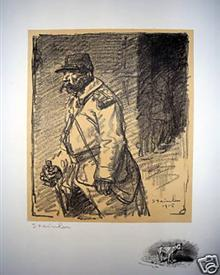

The artwork depicts people wandering on a bridge under a starry night sky.
0.14490682354605872


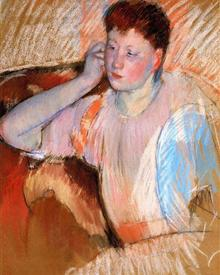

The artwork depicts a mother and daughter, standing side by side, dressed in black.
0.1440569105312129


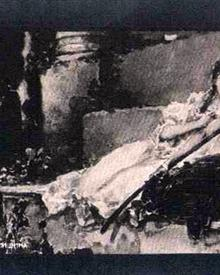

The artwork depicts a peaceful evening scene with a still lake reflecting the orange sky, surrounded by trees and mountains.
0.10662088516091818


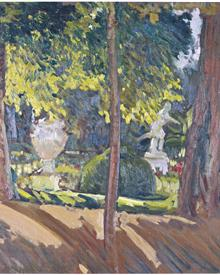

The artwork depicts a group of children playing on the beach of Valencia, with the sea and the blue sky stretching out behind them.
0.1433604996331665


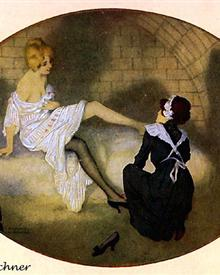

The artwork depicts Zeppelins in Paris on a cloudy day, with several buildings and people in the background.
0.09320871609234027


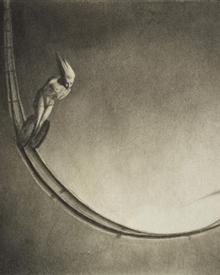

The artwork depicts a man with a dark hat and coat standing in a deserted landscape.
0.14929191116083218


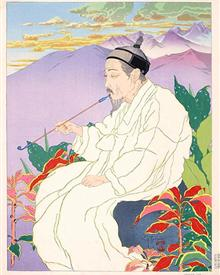

The artwork depicts a panoramic view of the Hokkan-zan mountain and Seoul city in the background, seen from a distance in "Hokkan-zan. Seoul, Coree.".
0.1446190533901137


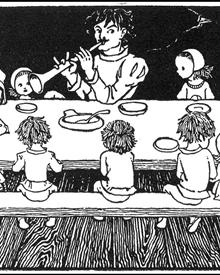

The artwork depicts a castle on a hill surrounded by trees, with a river flowing below and mountains in the distance, under a cloudy sky.
0.09227451075599041


In [30]:
show_examples(bad_examples)

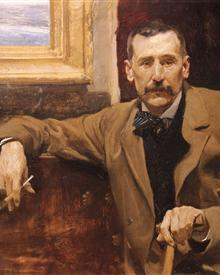

The artwork depicts Benito Perez Galdos sitting on a chair, looking thoughtfully to the side, with a dark background.
0.251902356603417


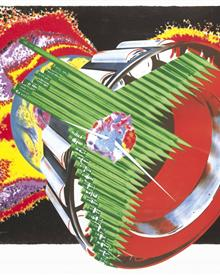

The artwork depicts a chaotic and colorful abstract composition resembling space dust.
0.19062850794146152


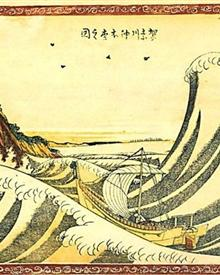

The artwork depicts a panoramic view of Honmoku port, with ships, buildings, and mountains in the distance.
0.23359884177804935


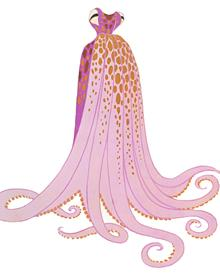

The artwork depicts a woman wearing a green dress with gold accents and a matching headpiece, holding a fan.
0.23648176249522612


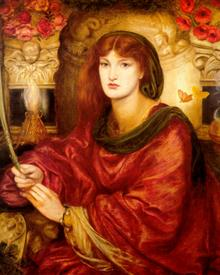

The artwork depicts Sibylla Palmifera, a woman holding a palm branch in one hand and a book in the other, while gazing upwards.
0.27696585390603173


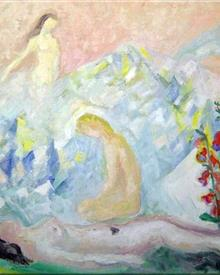

The artwork depicts an abstract composition with overlapping circles and curved lines in shades of red, blue, and white.
0.19824162675295443


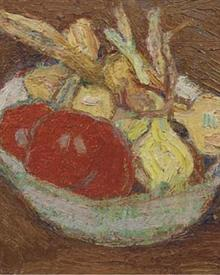

The artwork depicts a vibrant still life of various vegetables including cabbage, turnips, and carrots, arranged in a basket and on a tablecloth.
0.28279613534857395


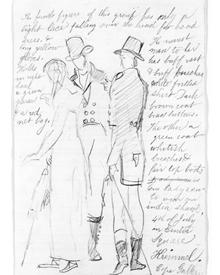

The artwork depicts sketches of a man sculpting a bust of a woman with chiseled features.
0.2750520775882264


In [31]:
show_examples(average_examples)

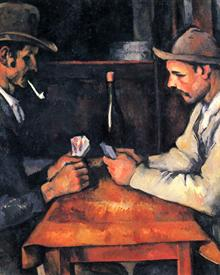

The artwork depicts two men playing cards at a table, with a bottle of wine and fruit.
0.3379482561223689


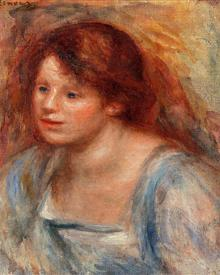

The artwork depicts a portrait of a young woman named Lucienne, with a serene expression and soft, warm colors.
0.32061199720324535


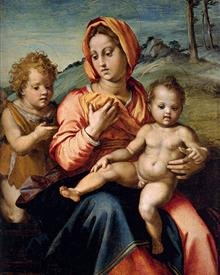

The artwork depicts Madonna holding the infant Christ, with Saint John the Baptist kneeling at her feet, set against a landscape with mountains and a river.
0.3063310847897166


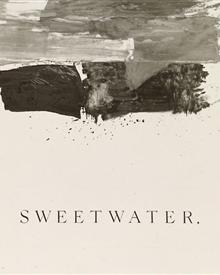

The artwork depicts the word "SWEETWATER" in blue letters against a white background.
0.3038089811780202


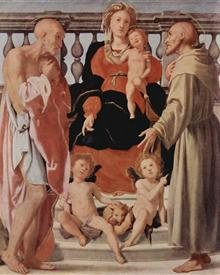

The artwork depicts the Madonna, with St. Francis and St. Jerome on either side of her, all dressed in intricate garments.
0.30750169470720173


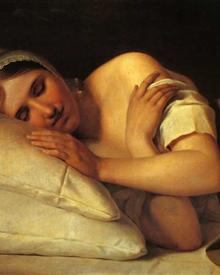

The artwork depicts a girl sleeping peacefully on a bed.
0.30877865080376965


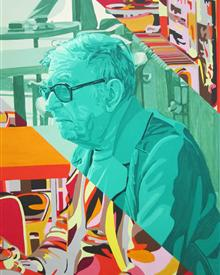

The artwork depicts the face of philosopher Jean-Paul Sartre, against a background of colorful geometric shapes and patterns in shades of blue, yellow, and red.
0.33658194497274685


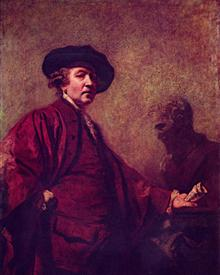

The artwork depicts a self-portrait of a man, looking directly at the viewer with a serious expression. He is wearing a red coat and has curly hair.
0.3316236277076825


In [32]:
show_examples(good_examples)

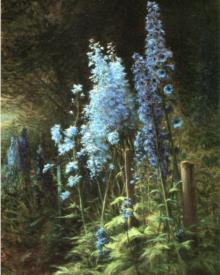

The artwork depicts blue delphinium flowers in a forest clearing with trees in the background.
0.3562246569475177


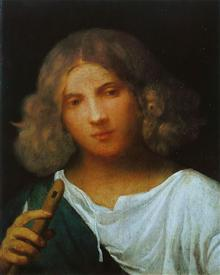

The artwork depicts a young boy holding a flute, looking out towards the viewer with a calm expression.
0.37227482059393613


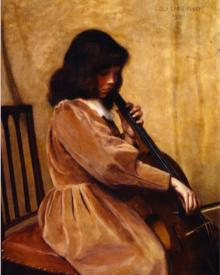

The artwork depicts a girl playing a cello, with a focused expression and a detailed rendering of the instrument.
0.3543737411930544


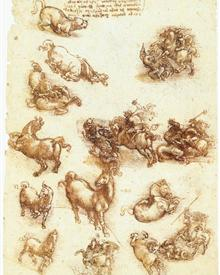

The artwork depicts a study sheet with multiple sketches of horses in various poses and expressions, captured in dynamic motion.
0.35202357355126346


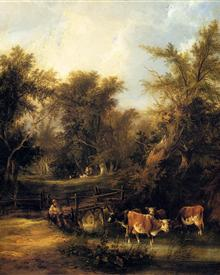

The artwork depicts a herd of cattle gathered by a stream in a rural landscape, with a bridge and trees in the background.
0.3634923774883764


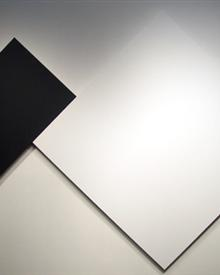

The artwork depicts a composition of two rectangular white and black canvases, displayed together, with a small white canvas above the black one.
0.36344550055402275


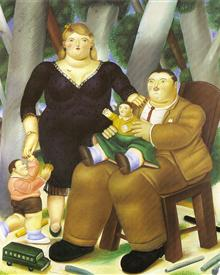

The artwork depicts a family of five sitting together, including two adults and three children, all with exaggerated features in Botero's signature style.
0.4123191743039672


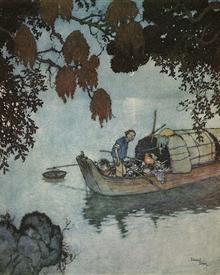

The artwork depicts a fisherman in a boat, listening to a nightingale's song.
0.35367916928676135


In [34]:
show_examples(very_good_examples)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 5.000e+00, 7.000e+00, 1.300e+01, 1.000e+01,
        1.500e+01, 1.200e+01, 3.000e+01, 3.100e+01, 3.700e+01, 4.500e+01,
        6.800e+01, 7.100e+01, 8.300e+01, 9.500e+01, 1.500e+02, 1.570e+02,
        1.780e+02, 1.920e+02, 2.100e+02, 2.610e+02, 3.360e+02, 3.870e+02,
        4.220e+02, 4.760e+02, 6.070e+02, 7.000e+02, 7.880e+02, 8.670e+02,
        9.530e+02, 1.131e+03, 1.260e+03, 1.364e+03, 1.579e+03, 1.716e+03,
        1.907e+03, 2.189e+03, 2.270e+03, 2.500e+03, 2.793e+03, 2.985e+03,
        3.070e+03, 3.278e+03, 3.511e+03, 3.735e+03, 3.837e+03, 3.968e+03,
        4.072e+03, 4.124e+03, 4.201e+03, 4.110e+03, 4.146e+03, 4.099e+03,
        4.132e+03, 3.857e+03, 3.799e+03, 3.629e+03, 3.345e+03, 3.162e+03,
        2.898e+03, 2.544e+03, 2.409e+03, 2.102e+03, 1.875e+03, 1.546e+03,
        1.294e+03, 1.048e+03, 8.380e+0

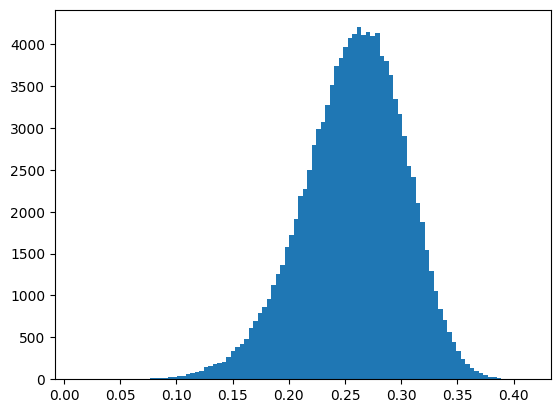

In [35]:
clip_scores = [v["clip_score"] for k, v in embeddings.items()]
plt.hist(clip_scores, bins=100)

In [36]:
print("Mean clip score: {}".format(np.mean(clip_scores)))
print("Min clip score: {}".format(np.min(clip_scores)))
print("Max clip score: {}".format(np.max(clip_scores)))

Mean clip score: 0.25749037526625945
Min clip score: 0.011852291624347634
Max clip score: 0.41317010715396973


In [37]:
with open(get_data_dir() / "raw" / "splits" / "train.txt", "r") as f:
    train_image_names = f.readlines()
    # remove newlines
    train_image_names = set([x.strip() for x in train_image_names])

len(train_image_names)

81382

In [38]:
total_clip_weight = 0
n_weighted_samples = 0
for k, v in embeddings.items():
    if k in train_image_names and v["clip_score"] >= 0.15:
        total_clip_weight += v["clip_score"] * 8 - (1/5)
        n_weighted_samples += 1
total_clip_weight / n_weighted_samples

1.8750954862130893

In [39]:
print(f"The weighted dataset is {total_clip_weight / len(train_image_names)} times larger than the original dataset")

The weighted dataset is 1.8461794502936302 times larger than the original dataset
